In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv(r'C:\Users\hp\Desktop\praj\bbc news\BBC News Train.csv')
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
data.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [4]:
freq_table = data.groupby(['Category']).size().reset_index(name='Count').rename(columns={'Category':'Category'})
freq_table

,Category,Count
0,business,336
1,entertainment,273
2,politics,274
3,sport,346
4,tech,261


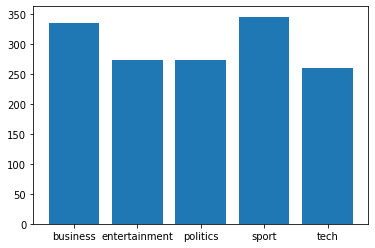

In [5]:
plt.bar(freq_table['Category'], freq_table['Count'])
plt.show()

In [6]:
data = data[["Text", "Category"]]

x = np.array(data["Text"])
y = np.array(data["Category"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=56)

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(X_test)))

0.9776422764227642


In [8]:
INPUT = input("Enter a Text: ")
data = cv.transform([INPUT]).toarray()
output = model.predict(data)
print(output)

Enter a Text: education is key
['politics']


In [9]:
data= pd.read_csv(r'C:\Users\hp\Desktop\praj\bbc news\BBC News Test.csv')
data.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [10]:
dataa = cv.transform(data['Text']).toarray()
output = model.predict(dataa)
output

array(['sport', 'tech', 'sport', 'business', 'sport', 'sport', 'politics',
       'politics', 'entertainment', 'business', 'business', 'tech',
       'politics', 'tech', 'entertainment', 'sport', 'politics', 'tech',
       'entertainment', 'entertainment', 'business', 'politics', 'sport',
       'business', 'politics', 'sport', 'business', 'sport', 'sport',
       'business', 'politics', 'tech', 'business', 'business', 'sport',
       'sport', 'sport', 'business', 'entertainment', 'politics',
       'politics', 'politics', 'entertainment', 'tech', 'sport', 'tech',
       'entertainment', 'business', 'politics', 'business', 'politics',
       'business', 'business', 'business', 'tech', 'politics', 'tech',
       'tech', 'sport', 'tech', 'sport', 'entertainment', 'tech',
       'politics', 'business', 'entertainment', 'sport', 'tech', 'sport',
       'sport', 'tech', 'sport', 'business', 'politics', 'tech', 'sport',
       'tech', 'tech', 'tech', 'entertainment', 'politics', 'sport',
   

In [11]:
data['Category'] = output
data.head()

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport


In [12]:
entry= data.drop(['Text'], axis=1)
entry 

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,politics
733,206,business
